# Using the Twitter API

I have used the Twitter API to access Twitter data in JSON format and used Twitter metadata to compare the most popular trends among large cities in the UK. I have also created frequency distributions of words in tweets related to a specific topic using Natural Language Processing with the Python library NLTK.

## Import Libraries

In [1]:
import pickle
import os
%matplotlib inline

## Load the credentials from the pickle file into the Twitter object

Reconstruction of that object is called deserialization = load back the Twitter access credentials from the pickle object (pkl) into the Python Twitter object.

In [2]:
Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

## Authorize an application to access Twitter account data

In [3]:
import twitter

auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

## Trends for UK cities

In [4]:
# Where on Earth ID --> http://woeid.rosselliot.co.nz/
cities = ['Cardiff', 'Edinburgh', 'Belfast', 'London', 'Manchester']
cities_id = [15127, 19344, 44544, 44418, 28218]

In [5]:
#Create cities_trends list. Each element of the list is the twitter api object for each city. 

cities_trends = []

for city_id in cities_id:
    cities_trends.append(twitter_api.trends.place(_id=city_id))

cities_trends = [[{Cardiff}],[{Edinburgh}],...]

[{Cardiff}] = [{trends:"", as_of:"", created_at:"", locations:""}]

trends: [{trend_1},{trend_2},...]

{trend_1} = {name:"", url:"", tweet_volume:"", ...}

In [8]:
import json

In [9]:
# Print first twitter object from the cities_trends list for Cardiff as json
print((json.dumps(cities_trends[0], indent=1)))

[
 {
  "trends": [
   {
    "name": "Game of Thrones",
    "url": "http://twitter.com/search?q=%22Game+of+Thrones%22",
    "promoted_content": null,
    "query": "%22Game+of+Thrones%22",
    "tweet_volume": 288732
   },
   {
    "name": "Arsenal",
    "url": "http://twitter.com/search?q=Arsenal",
    "promoted_content": null,
    "query": "Arsenal",
    "tweet_volume": 418360
   },
   {
    "name": "Trump",
    "url": "http://twitter.com/search?q=Trump",
    "promoted_content": null,
    "query": "Trump",
    "tweet_volume": 2521782
   },
   {
    "name": "#Wales",
    "url": "http://twitter.com/search?q=%23Wales",
    "promoted_content": null,
    "query": "%23Wales",
    "tweet_volume": null
   },
   {
    "name": "#backtowork",
    "url": "http://twitter.com/search?q=%23backtowork",
    "promoted_content": null,
    "query": "%23backtowork",
    "tweet_volume": null
   },
   {
    "name": "#charitytuesday",
    "url": "http://twitter.com/search?q=%23charitytuesday",
    "promoted_co

In [10]:
# cities_trends[0] is the first twitter api object for Cardiff 
# which is a list with only one element which is a dictionary
cities_trends[0][0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [11]:
import pandas as pd

In [12]:
# Loop through the twitter api object for each city to collect the names of the top trends.

trends = []
for city in cities_trends:
    t = []
    for trend in city[0]['trends']:
        t.append(trend['name'])
    trends.append(t)

trends = pd.DataFrame(trends).transpose()
trends.columns=cities 
trends.head()

,Cardiff,Edinburgh,Belfast,London,Manchester
0,Game of Thrones,North Korea,#GameOfThrones,#GameOfThrones,#backtowork
1,Arsenal,#LWYMMDvideo,#CinemaDay17,#backtowork,#GameOfThrones
2,Trump,#edintravel,Arsenal,#charitytuesday,#USOpen
3,#Wales,#Scotland,Liverpool,#TravelTuesday,#BankHolidayMonday
4,#backtowork,Arsenal,Tyrone,Hellboy,#TipsFT


In [13]:
trends

,Cardiff,Edinburgh,Belfast,London,Manchester
0,Game of Thrones,North Korea,#GameOfThrones,#GameOfThrones,#backtowork
1,Arsenal,#LWYMMDvideo,#CinemaDay17,#backtowork,#GameOfThrones
2,Trump,#edintravel,Arsenal,#charitytuesday,#USOpen
3,#Wales,#Scotland,Liverpool,#TravelTuesday,#BankHolidayMonday
4,#backtowork,Arsenal,Tyrone,Hellboy,#TipsFT
5,#charitytuesday,Brexit,Ireland,Jordan Pickford,Up to £200 Welcome Bonus
6,#TravelTuesday,#GameOfThrones,#Belfast,Japan,Jordan Pickford
7,Hellboy,#backtowork,#backtowork,#r4today,Hellboy
8,Jordan Pickford,Jordan Pickford,#charitytuesday,London Waterloo,Japan
9,Japan,Hellboy,Jordan Pickford,Naby Keita,London Waterloo


## Compare trends between London and other UK cities

In [18]:
import copy
lonvs = copy.copy(trends)

In [19]:
# The index may be a measure of how popular the trend is. The closer to the top, the more popular the trend.
# I can find how popular each of the top 10 trends in London is in the other UK cities.

for city in ['Cardiff', 'Edinburgh', 'Belfast', 'Manchester']:
    t = []
    for trend in lonvs['London']:
        try:
            t.append(list(lonvs['London']).index(trend)-list(lonvs[city]).index(trend))
        except:
            t.append(0.1)
    lonvs[city] = t

lonvs.index=lonvs['London']
lonvs.drop('London', 1, inplace=True)

lonvs.head(10)

,Cardiff,Edinburgh,Belfast,Manchester
London,,,,
#GameOfThrones,0.1,-6.0,0.0,-1.0
#backtowork,-3.0,-6.0,-6.0,1.0
#charitytuesday,-3.0,-29.0,-6.0,-30.0
#TravelTuesday,-3.0,-29.0,-30.0,-30.0
Hellboy,-3.0,-5.0,-6.0,-3.0
Jordan Pickford,-3.0,-3.0,-4.0,-1.0
Japan,-3.0,0.1,-5.0,-2.0
#r4today,-3.0,-26.0,-27.0,-27.0
London Waterloo,-3.0,-2.0,-4.0,-1.0


Each cell in the table above shows the difference in ranking between one of the top 50 London trends and another city. For example, the top trend in London #GameOfThrones is 6 places behind in ranking in Edinburgh.

The chart below visualises the results. 
* A negative bar actually shows how many places behind the London ranking the trend is in another city. 
* If a bar is positive, then actually the corresponding trend is more popular in that city than in London
* If a bar doesn't exist, that means that this London trends has exactly the sme ranking in the other city
* If a bar is 0.1, that means that this London trend does not appear among the top 50 trends in that city

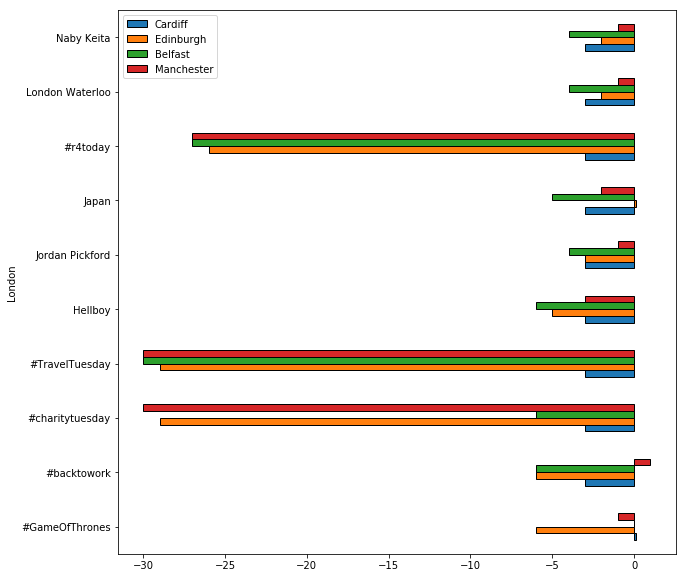

In [21]:
lonvs.head(10).plot.barh(figsize=(10,10), edgecolor='black')

## Compare trends between Cardiff and UK capitals

In [24]:
import copy
cardvs = copy.copy(trends)

In [25]:
# The index may be a measure of how popular the trend is. The closer to the top, the more popular the trend.
# I can find how popular each of the top 10 trends in Cardiff is in the other UK cities.

for city in ['Edinburgh', 'Belfast', 'London', 'Manchester']:
    t = []
    for trend in cardvs['Cardiff']:
        try:
            t.append(list(cardvs['Cardiff']).index(trend)-list(cardvs[city]).index(trend))
        except:
            t.append(0.1)
    cardvs[city] = t

cardvs.index=cardvs['Cardiff']
cardvs.drop('Cardiff', 1, inplace=True)

cardvs.head(10)

,Edinburgh,Belfast,London,Manchester
Cardiff,,,,
Game of Thrones,0.1,0.1,0.1,0.1
Arsenal,-3.0,-1.0,0.1,0.1
Trump,0.1,0.1,0.1,0.1
#Wales,0.1,0.1,0.1,0.1
#backtowork,-3.0,-3.0,3.0,4.0
#charitytuesday,-26.0,-3.0,3.0,-27.0
#TravelTuesday,-26.0,-27.0,3.0,-27.0
Hellboy,-2.0,-3.0,3.0,0.0
Jordan Pickford,0.0,-1.0,3.0,2.0


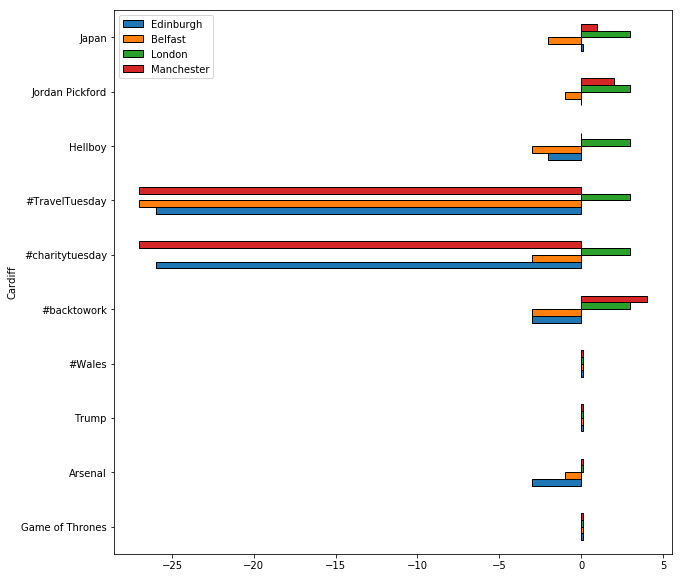

In [26]:
cardvs.head(10).plot.barh(figsize=(10,10), edgecolor='black')

## Top 10 trends for the whole UK

In [200]:
uk_twitter_api = twitter_api.trends.place(_id=23424975)

trends = []
for trend in uk_twitter_api[0]['trends']:
    trends.append(trend['name'])

trends = pd.DataFrame(trends)
trends.columns=['UK top trends']
trends.head(10)

,UK top trends
0,#GBBO
1,Shai Hope
2,#ENGvsWI
3,Owen Farrell
4,#pointless
5,Sakho
6,Roy Keane
7,Kylian Hazard
8,Mason Crane
9,Fox News


## Compare positive and negative tweets about a topic among different UK cities

In [204]:
def filter_statuses(statuses):
    """This function iterates through the statuses, filters out the duplicates 
    and returns a list of the filtered statuses and a list of the filtered texts"""
    filtered_texts = []
    filtered_statuses = []
    for s in statuses:
        if not s["text"] in filtered_texts:
            filtered_texts.append(s['text'])
            filtered_statuses.append(s)      
    return filtered_statuses, filtered_texts 

In [205]:
topics = ['#Brexit', '#StopBrexitNow', '#Remain', '#Leave', '#BrexitUnicorns', '#Remainers', '#Brexiteers']
# topics = ['#GameofThrones', '#GoTS7', '#GOT', '#GameofThrones']
number = 100
cities = ['Cardiff', 'Edinburgh', 'Belfast', 'London', 'Manchester']
geocodes = ['51.486640,-3.166384,4mi', '55.960488,-3.187913,6mi', '54.603826,-5.929732,4mi', 
             '51.507466,-0.127774,20mi', '53.476283,-2.239703,7mi']

cities_texts = []
for geocode in geocodes:
    all_statuses = []
    for topic in topics:
        twapi = twitter_api.search.tweets(q=topic, count=number, geocode=geocode)
        all_statuses.extend(twapi['statuses'])
    statuses, texts = filter_statuses(all_statuses)
    cities_texts.append(texts)

In [206]:
def pos_neg(text):
    """
    Slightly modified sentiment classification using Liu and Hu opinion lexicon.
    This function counts the number of positive, negative and neutral words
    in the tweet and classifies it depending on which polarity is more represented.
    Words that do not appear in the lexicon are considered as neutral.
    """
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(text)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1

    if pos_words > neg_words:
        return 'positive'
    elif pos_words < neg_words:
        return 'negative'
    else:
        return 'neutral'

In [207]:
cities_texts_sentiments = []
npos_nneg_ntot = []

for city in cities_texts:
    
    texts_sentiments = []    
    npos = 0
    nneg = 0
    ntot = len(city)

    for text in city:
        
        sentiment = pos_neg(text)
        texts_sentiments.append([text, sentiment])
    
        if sentiment == 'positive':
            npos += 1
        elif sentiment == 'negative':
            nneg += 1
    
    cities_texts_sentiments.append(texts_sentiments)
    npos_nneg_ntot.append([npos, nneg, ntot])    

In [208]:
npos_nneg_ntot

[[24, 23, 93], [25, 17, 88], [13, 21, 75], [98, 118, 420], [34, 30, 115]]

In [209]:
import pandas as pd
npos_nneg_ntot = pd.DataFrame(npos_nneg_ntot, columns=['pos', 'neg', 'tot'])
npos_nneg_ntot.set_index([cities], inplace=True)

In [210]:
npos_nneg_ntot

,pos,neg,tot
Cardiff,24,23,93
Edinburgh,25,17,88
Belfast,13,21,75
London,98,118,420
Manchester,34,30,115


In [211]:
npos_nneg_ntot['pos/neg'] = npos_nneg_ntot['pos']/npos_nneg_ntot['neg']
npos_nneg_ntot

,pos,neg,tot,pos/neg
Cardiff,24,23,93,1.043478
Edinburgh,25,17,88,1.470588
Belfast,13,21,75,0.619048
London,98,118,420,0.830508
Manchester,34,30,115,1.133333


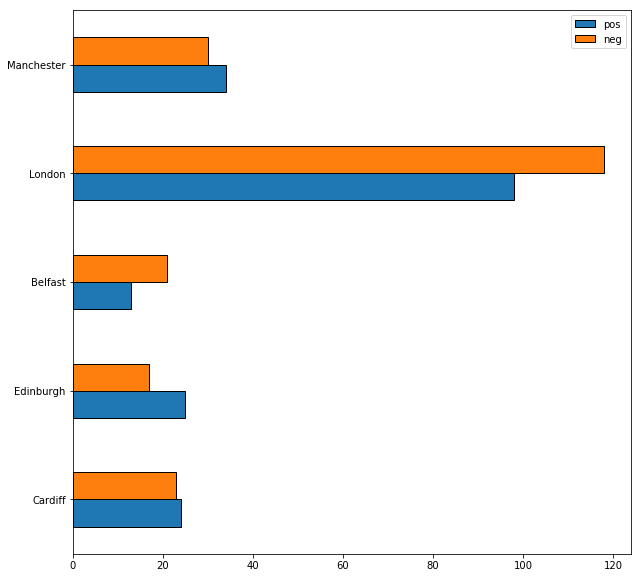

In [228]:
npos_nneg_ntot[['pos','neg']].plot.barh(figsize=(10,10), edgecolor='black')

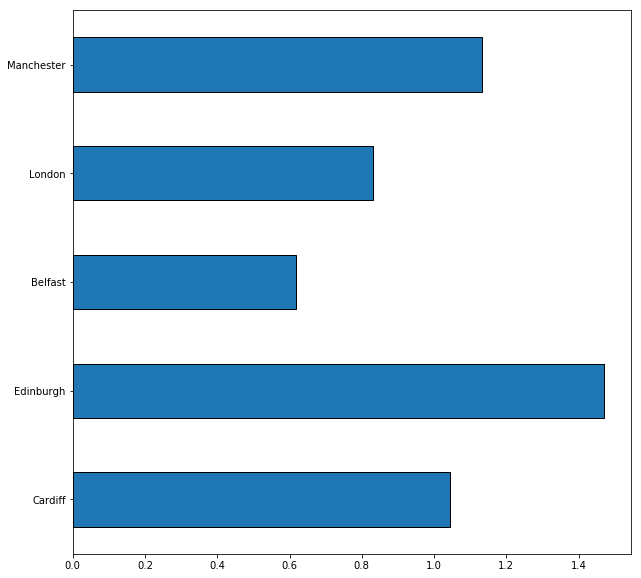

In [229]:
npos_nneg_ntot['pos/neg'].plot.barh(figsize=(10,10), edgecolor='black')

In [212]:
for city in cities_texts_sentiments:
    for text in city:
        if text[1] == 'negative':
            print(text) 

['@johnredwood @GMB So we have a new type of #Brexit now eh? "Car crash Brexit" I am sick of these politicians that i… https://t.co/nNS0n2iHz4', 'negative']
['RT CostinCercel "When just 6% of #UK population was made of European #migrants, yet #brexit Leave campaign lied https://t.co/UWKIPx21Dh"', 'negative']
['#TheresaMay will apparently resign after #Brexit . Personally i think she mentally resigned since May', 'negative']
['So, £1 gets you €1 and all we hear is “our holidays will be more expensive”. Like that’s the biggest issue here... #Brexit #1stWorldProbs', 'negative']
['@BritainStays @Keir_Starmer @KateHoeyMP and @frankfieldmp are siren voices on #Brexit. Ignore them and put  the country first', 'negative']
['RT @eberlmat: PM admits hard #Brexit will be total disaster for UK, promises to push through regardless and not take political responsibili…', 'negative']
['Now the whole #Brexit debacle needs to be brought to a halt, then abandoned. Quietly or otherwise, I’m not bothered… 

## Tokenize Text in Words

In [213]:
cities_texts

[['@johnredwood @GMB So we have a new type of #Brexit now eh? "Car crash Brexit" I am sick of these politicians that i… https://t.co/nNS0n2iHz4',
  'Have you booked your place at our latest workshop event? "HR succession planning – post Brexit" &gt;… https://t.co/C3k0tdPXcV',
  'Cllr Rob Stewart, Deputy Leader, WLGA has kindly agreed to chair at the #Brexit and the #WelshEconomy conf: https://t.co/riec9yfxVq',
  'RT @neurosciencecu: CALLING #NEUROSCIENTISTS! @BritishNeuro would love to hear your views on research, #Brexit &amp; REF. Take the survey: http…',
  'RT @telescoper: "#Brexit was a success, but unfortunately the pound died." https://t.co/K3KvX3FG3t',
  '#Brexit https://t.co/ACeN71skEA',
  'CALLING #NEUROSCIENTISTS! @BritishNeuro would love to hear your views on research, #Brexit &amp; REF. Take the survey:… https://t.co/KJLWGpKLW5',
  '"#Brexit was a success, but unfortunately the pound died." https://t.co/K3KvX3FG3t',
  "RT @eberlmat: May's scaremongering deters foreign stude

In [214]:
import nltk

# Download the parameters of the punct word tokenizer of nltk 
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/lefteris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [215]:
words = []

for city in cities_texts:
    for text in city:
        tokenized_text = nltk.word_tokenize(text)
        for word in tokenized_text:
            words.append(word)

In [216]:
words

['@',
 'johnredwood',
 '@',
 'GMB',
 'So',
 'we',
 'have',
 'a',
 'new',
 'type',
 'of',
 '#',
 'Brexit',
 'now',
 'eh',
 '?',
 '``',
 'Car',
 'crash',
 'Brexit',
 "''",
 'I',
 'am',
 'sick',
 'of',
 'these',
 'politicians',
 'that',
 'i…',
 'https',
 ':',
 '//t.co/nNS0n2iHz4',
 'Have',
 'you',
 'booked',
 'your',
 'place',
 'at',
 'our',
 'latest',
 'workshop',
 'event',
 '?',
 '``',
 'HR',
 'succession',
 'planning',
 '–',
 'post',
 'Brexit',
 "''",
 '&',
 'gt',
 ';',
 '…',
 'https',
 ':',
 '//t.co/C3k0tdPXcV',
 'Cllr',
 'Rob',
 'Stewart',
 ',',
 'Deputy',
 'Leader',
 ',',
 'WLGA',
 'has',
 'kindly',
 'agreed',
 'to',
 'chair',
 'at',
 'the',
 '#',
 'Brexit',
 'and',
 'the',
 '#',
 'WelshEconomy',
 'conf',
 ':',
 'https',
 ':',
 '//t.co/riec9yfxVq',
 'RT',
 '@',
 'neurosciencecu',
 ':',
 'CALLING',
 '#',
 'NEUROSCIENTISTS',
 '!',
 '@',
 'BritishNeuro',
 'would',
 'love',
 'to',
 'hear',
 'your',
 'views',
 'on',
 'research',
 ',',
 '#',
 'Brexit',
 '&',
 'amp',
 ';',
 'REF',
 '.',
 '

In [217]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lefteris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
import string

In [219]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [220]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [221]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
#useless_words
#type(useless_words)

## Plotting Frequencies of Words 

In [222]:
len(words)

18510

In [223]:
filtered_words = [word 
                  for word in words 
                      if not word.lower() in useless_words]

In [224]:
len(filtered_words)

9776

In [225]:
from collections import Counter

word_counter = Counter(filtered_words)

In [226]:
most_common_words = word_counter.most_common()[:100]

In [227]:
most_common_words

[('https', 570),
 ('Brexit', 357),
 ('RT', 186),
 ('Remain', 105),
 ("'s", 103),
 ('EU', 95),
 ('UK', 83),
 ('brexit', 76),
 ('StopBrexitNow', 73),
 ('amp', 68),
 ("n't", 67),
 ('Brexiteers', 66),
 ('Labour', 62),
 ('Leave', 55),
 ('``', 46),
 ("''", 46),
 ('...', 45),
 ('leave', 41),
 ('StopBrexit', 32),
 ('like', 31),
 ('would', 29),
 ('remain', 29),
 ('ExitBrexit', 29),
 ('voted', 28),
 ('remainers', 26),
 ('want', 25),
 ('still', 25),
 ('get', 24),
 ('’', 22),
 ('StopBrexitHour', 22),
 ('…', 20),
 ('brexitshambles', 20),
 ('people', 20),
 ('time', 19),
 ('negotiations', 19),
 ('jeremycorbyn', 19),
 ('back', 19),
 ('Join', 19),
 ('Suns', 19),
 ('know', 18),
 ('need', 18),
 ('brexiteers', 18),
 ('voters', 17),
 ('must', 16),
 ('UKLabour', 16),
 ('one', 16),
 ('6pm-7pm', 16),
 ('Manchester', 16),
 ('campaign', 15),
 ('wants', 15),
 ('Britain', 15),
 ('stop', 15),
 ('OwenJones84', 15),
 ('govt', 15),
 ('says', 15),
 ('via', 15),
 ('trade', 15),
 ('2', 15),
 ('Remainers', 15),
 ('new', 

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

In [202]:
word_counter

Counter({'RT': 169,
         'Film89UK': 1,
         'GameOfThrones': 346,
         'Season': 23,
         '7': 33,
         'finale': 101,
         'amp': 29,
         'season': 100,
         'whole': 5,
         'smashed': 3,
         'viewer': 2,
         'records': 2,
         'https': 585,
         '//t.co/giSEqMpgVb': 2,
         'JennyLovlie': 1,
         'end': 13,
         '💀💀💀': 2,
         'GameOfThronesFinale': 47,
         'GoTS7Finale': 76,
         '//t.co/mKGp5hdaKT': 2,
         'Arguably': 1,
         'enjoyable': 1,
         'Appreciate': 1,
         "n't": 84,
         'like': 43,
         'rushed': 1,
         'ca': 26,
         'fault': 1,
         'drama': 2,
         'script': 1,
         "'m": 32,
         'shocked': 2,
         'main': 4,
         'characters': 8,
         'make': 7,
         '500,000': 1,
         'per': 2,
         'episode': 49,
         '😐': 1,
         'wtf': 2,
         '//t.co/IXpyYRfUoj': 1,
         'RWCMD': 1,
         'else': 10,
  

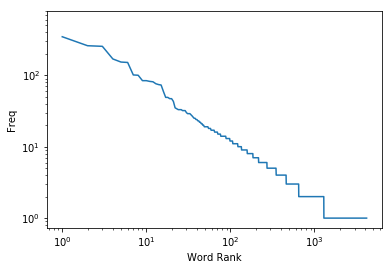

In [203]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

In [230]:
topics = ['#NorthKorea', '#DPRK', '#northkorean', '#NK', '#North_Korea', '#Pyongyang', 
          '#NorthKoreamissile', '#KimJongUn', 'kimjongun', '#northkorea']
number = 100

all_statuses = []    
for topic in topics:
    twapi = twitter_api.search.tweets(q=topic, count=number)
    all_statuses.extend(twapi['statuses'])
statuses, texts = filter_statuses(all_statuses)

In [231]:
texts

["RT @DutchMFA: FM #Koenders: 'The Netherlands strongly condemns latest missile launches #NorthKorea. Regime must cease to provoke. Focus on…",
 '#EU condemns #NorthKorea #missile launch, considers next steps\nhttps://t.co/fibGAt0K3t https://t.co/mvl9pzTg7B',
 "RT @TaraCopp: Statement from Pentagon w/ a few more details on last night's IRBM launch from #NorthKorea https://t.co/JMGDE90JoA",
 'RT @RealNMWD: #Breaking: New video shows incoming missile warning and alarms sounding after #NorthKorea launched missile over #Hokkaido, #J…',
 'We must exhaust every peaceful option before Trump puts “all options on the table” &amp; considers launching a preventive war. #NorthKorea',
 'RT @JaySekulow: #NorthKorea must realize its actions have geopolitical ramifications. Our military experts discuss on #JayLive. https://t.c…',
 "RT @nktpnd: NEW: U.S. Department of Defense statement on #NorthKorea's August 29 ballistic missile launch over Japan. https://t.co/NDm6T48F…",
 'RT @CanadaFP: Canada condem

In [232]:
texts_sentiments = []    
npos = 0
nneg = 0
ntot = len(texts)

for text in texts:
    sentiment = pos_neg(text)
    texts_sentiments.append([text, sentiment])
    if sentiment == 'positive':
        npos += 1
    elif sentiment == 'negative':
        nneg += 1

In [233]:
ntot

482

In [234]:
npos

94

In [235]:
nneg

111

In [236]:
texts_sentiments

[["RT @DutchMFA: FM #Koenders: 'The Netherlands strongly condemns latest missile launches #NorthKorea. Regime must cease to provoke. Focus on…",
  'negative'],
 ['#EU condemns #NorthKorea #missile launch, considers next steps\nhttps://t.co/fibGAt0K3t https://t.co/mvl9pzTg7B',
  'negative'],
 ["RT @TaraCopp: Statement from Pentagon w/ a few more details on last night's IRBM launch from #NorthKorea https://t.co/JMGDE90JoA",
  'neutral'],
 ['RT @RealNMWD: #Breaking: New video shows incoming missile warning and alarms sounding after #NorthKorea launched missile over #Hokkaido, #J…',
  'negative'],
 ['We must exhaust every peaceful option before Trump puts “all options on the table” &amp; considers launching a preventive war. #NorthKorea',
  'positive'],
 ['RT @JaySekulow: #NorthKorea must realize its actions have geopolitical ramifications. Our military experts discuss on #JayLive. https://t.c…',
  'neutral'],
 ["RT @nktpnd: NEW: U.S. Department of Defense statement on #NorthKorea's August

In [237]:
words = []

for text in texts:
    tokenized_text = nltk.word_tokenize(text)
    for word in tokenized_text:
        words.append(word)

In [238]:
len(words)

10993

In [239]:
filtered_words = [word 
                  for word in words 
                      if not word.lower() in useless_words]

In [240]:
len(filtered_words)

6545

In [241]:
from collections import Counter

word_counter = Counter(filtered_words)

It also has a `most_common()` method to access the words with the higher count:

In [242]:
most_common_words = word_counter.most_common()[:100]

In [243]:
most_common_words

[('https', 340),
 ('RT', 169),
 ('missile', 115),
 ('NorthKorea', 113),
 ('NK', 80),
 ('KimJongUn', 74),
 ('Japan', 73),
 ('Pyongyang', 67),
 ('DPRK', 57),
 ('NorthKoreamissile', 56),
 ('Trump', 55),
 ("'s", 48),
 ('Korea', 46),
 ('launch', 41),
 ('``', 41),
 ('North', 40),
 ("''", 40),
 ('...', 37),
 ('North_Korea', 29),
 ('de', 28),
 ('Missile', 27),
 ('latest', 25),
 ('options', 24),
 ('table', 24),
 ('test', 24),
 ('NorthKorean', 24),
 ('la', 24),
 ('US', 23),
 ('says', 23),
 ('amp', 22),
 ('un', 21),
 ('di', 21),
 ('’', 19),
 ('POTUS', 18),
 ('UN', 17),
 ('Breaking', 16),
 ('ballistic', 16),
 ('⬆️', 15),
 ('il', 15),
 ('via', 14),
 ('condemns', 13),
 ('…', 13),
 ('China', 12),
 ('USA', 12),
 ('“', 11),
 ('non', 11),
 ('e', 11),
 ('che', 11),
 ('que', 11),
 ('must', 10),
 ('”', 10),
 ('Korean', 10),
 ('realDonaldTrump', 10),
 ('MaximonGT', 10),
 ('last', 9),
 ('coreadelnord', 9),
 ('would', 9),
 ('right', 9),
 ('Giappone', 9),
 ('STARRUIZ25', 9),
 ('Pentagon', 8),
 ('war', 8),
 ('f

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt

In [245]:
word_counter

Counter({'RT': 169,
         'DutchMFA': 1,
         'FM': 3,
         'Koenders': 1,
         "'The": 1,
         'Netherlands': 1,
         'strongly': 5,
         'condemns': 13,
         'latest': 25,
         'missile': 115,
         'launches': 4,
         'NorthKorea': 113,
         'Regime': 1,
         'must': 10,
         'cease': 3,
         'provoke': 1,
         'Focus': 1,
         'on…': 1,
         'EU': 2,
         'launch': 41,
         'considers': 3,
         'next': 5,
         'steps': 1,
         'https': 340,
         '//t.co/fibGAt0K3t': 1,
         '//t.co/mvl9pzTg7B': 1,
         'TaraCopp': 1,
         'Statement': 2,
         'Pentagon': 8,
         'w/': 2,
         'details': 1,
         'last': 9,
         'night': 3,
         "'s": 48,
         'IRBM': 7,
         '//t.co/JMGDE90JoA': 1,
         'RealNMWD': 1,
         'Breaking': 16,
         'New': 3,
         'video': 4,
         'shows': 2,
         'incoming': 1,
         'warning': 5,
         'a

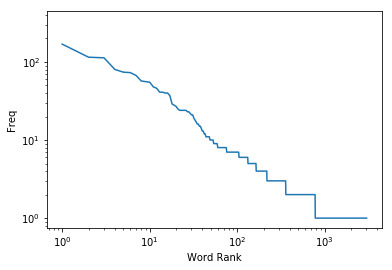

In [246]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");